In [ ]:
Initial Considerations in the Food Sector:
	•	At the beginning of our project, we considered focusing on the food and nutrition sector.
	•	While we identified some interesting questions, it was challenging to find a sufficiently large dataset that met the requirements of a Big Data project.
	•	Due to the limited availability of suitable data, we decided to discard this idea.

In [ ]:
Exploration in the Energy Sector:
	•	Next, we explored the energy sector, as there are often comprehensive datasets available on topics such as electricity consumption, renewable energy, or grid stability.
	•	Although we found many large datasets, it was difficult to define a clear and feasible use case that could be implemented with the data.
	•	For this reason, we decided not to pursue this area further.

In [ ]:
	Current Considerations: Wikipedia Data:
    •	Currently, we are evaluating the possibility of working with Wikipedia data.
	•	Our idea is to develop a method for automatically categorizing Wikipedia articles.
	•	This approach offers an interesting challenge due to the large amount of data available and provides the opportunity to apply techniques like text analysis and machine learning.

In [ ]:
mit pandas können wir die Daten laden und analysieren

In [19]:
import pandas as pd

# Pfad zur CSV-Datei
file_path = '/Users/konradmaywald/AdvDataEng_Project/aisdk-2024-03-01.csv'

# CSV-Datei laden
data = pd.read_csv(file_path)

# Ersten Einblick in die Daten
print(data.head())

           # Timestamp Type of mobile       MMSI   Latitude  Longitude  \
0  01/03/2024 00:00:00        Class A  219000873  56.990910  10.304543   
1  01/03/2024 00:00:00   Base Station    2190068  56.447260  10.945872   
2  01/03/2024 00:00:00        Class A  219016683  56.800165   9.024933   
3  01/03/2024 00:00:00        Class A  219000615  56.967093   9.224287   
4  01/03/2024 00:00:00   Base Station    2190071  57.110043   8.648282   

          Navigational status  ROT  SOG    COG  Heading  ... Length  \
0      Under way using engine  NaN  0.0   30.2      NaN  ...    NaN   
1               Unknown value  NaN  NaN    NaN      NaN  ...    NaN   
2      Under way using engine  0.0  0.0  257.3     17.0  ...    NaN   
3  Restricted maneuverability  0.0  2.3   69.8     67.0  ...    NaN   
4               Unknown value  NaN  NaN    NaN      NaN  ...    NaN   

  Type of position fixing device Draught Destination  ETA  Data source type  \
0                      Undefined     NaN     Unkn

In [ ]:
Wir überprüfen die Dimensionen und Spalten der Datei

In [20]:
print(data.info())  # Übersicht der Spalten und Datentypen
print(data.describe())  # Statistische Zusammenfassung (nur numerische Daten)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15512927 entries, 0 to 15512926
Data columns (total 26 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   # Timestamp                     object 
 1   Type of mobile                  object 
 2   MMSI                            int64  
 3   Latitude                        float64
 4   Longitude                       float64
 5   Navigational status             object 
 6   ROT                             float64
 7   SOG                             float64
 8   COG                             float64
 9   Heading                         float64
 10  IMO                             object 
 11  Callsign                        object 
 12  Name                            object 
 13  Ship type                       object 
 14  Cargo type                      object 
 15  Width                           float64
 16  Length                          float64
 17  Type of position fixing d

In [17]:
Daten vorbereiten, Null-Werte prüfen und behandel

SyntaxError: invalid syntax (1440123882.py, line 1)

In [21]:
print(data.isnull().sum())  # Anzahl der fehlenden Werte pro Spalte
data = data.dropna()  # Entfernt Zeilen mit fehlenden Werten

# Timestamp                              0
Type of mobile                           0
MMSI                                     0
Latitude                                 0
Longitude                                0
Navigational status                      0
ROT                                4643751
SOG                                1382887
COG                                2226564
Heading                            3314689
IMO                                      0
Callsign                                 0
Name                               1237673
Ship type                                0
Cargo type                        12997324
Width                              1559645
Length                             1559013
Type of position fixing device           0
Draught                            3846788
Destination                          14569
ETA                                5373925
Data source type                         0
A                                  1590677
B          

In [22]:
print(data.dtypes)  # Zeigt die Datentypen jeder Spalte

# Timestamp                        object
Type of mobile                     object
MMSI                                int64
Latitude                          float64
Longitude                         float64
Navigational status                object
ROT                               float64
SOG                               float64
COG                               float64
Heading                           float64
IMO                                object
Callsign                           object
Name                               object
Ship type                          object
Cargo type                         object
Width                             float64
Length                            float64
Type of position fixing device     object
Draught                           float64
Destination                        object
ETA                                object
Data source type                   object
A                                 float64
B                                 

In [23]:
# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

# Check datatypes
print("\nData types:")
print(data.dtypes)

# Check statistical summary
print("\nStatistical summary:")
print(data.describe())

# Check if Timestamp is sorted
print("\nIs Timestamp sorted?")
print(data.index.is_monotonic_increasing)

Missing values per column:
# Timestamp                       0
Type of mobile                    0
MMSI                              0
Latitude                          0
Longitude                         0
Navigational status               0
ROT                               0
SOG                               0
COG                               0
Heading                           0
IMO                               0
Callsign                          0
Name                              0
Ship type                         0
Cargo type                        0
Width                             0
Length                            0
Type of position fixing device    0
Draught                           0
Destination                       0
ETA                               0
Data source type                  0
A                                 0
B                                 0
C                                 0
D                                 0
dtype: int64

Data types:
# Timestamp

In [ ]:
Da Timestamp als Object gespeichert ist müssen wir dessen Format ändern um damit später weiter arbeiten zu können:

In [5]:
data['# Timestamp'] = pd.to_datetime(data['# Timestamp'], format='%d/%m/%Y %H:%M:%S', errors='coerce')

In [6]:
print(data.dtypes)  # Zeigt an, dass 'Timestamp' jetzt 'datetime64[ns]' ist
print(data['# Timestamp'].head())  # Überprüft die Werte

# Timestamp                       datetime64[ns]
Type of mobile                            object
MMSI                                       int64
Latitude                                 float64
Longitude                                float64
Navigational status                       object
ROT                                      float64
SOG                                      float64
COG                                      float64
Heading                                  float64
IMO                                       object
Callsign                                  object
Name                                      object
Ship type                                 object
Cargo type                                object
Width                                    float64
Length                                   float64
Type of position fixing device            object
Draught                                  float64
Destination                               object
ETA                 

In [7]:
selected_columns = data[['# Timestamp', 'Latitude', 'Longitude', 'SOG', 'COG']]

In [28]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 27.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 27.0 MB/s eta 0:00:00


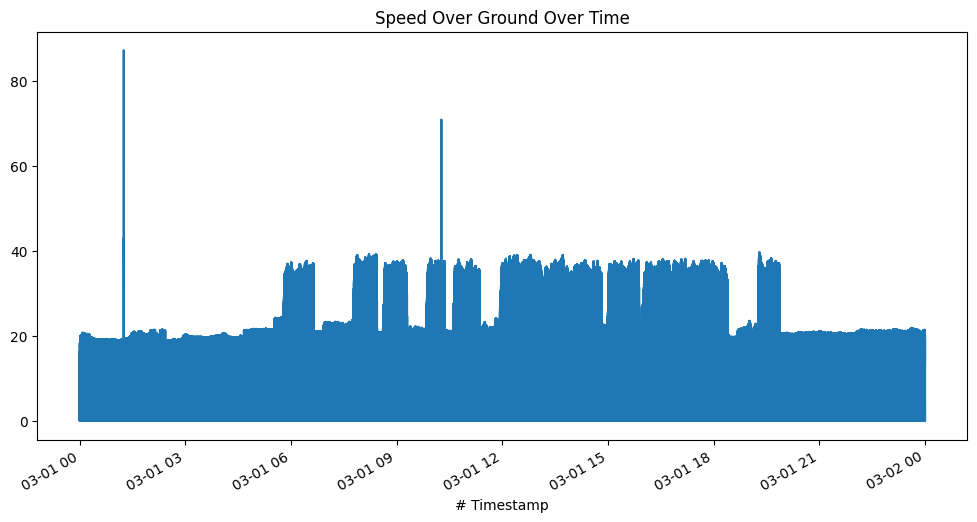

In [8]:
import matplotlib.pyplot as plt

data['# Timestamp'] = pd.to_datetime(data['# Timestamp'])
data.set_index('# Timestamp', inplace=True)

data['SOG'].plot(figsize=(12, 6), title='Speed Over Ground Over Time')
plt.show()

In [ ]:
Karten Visualisierungen mit Scatterplot über breiten und längengrade

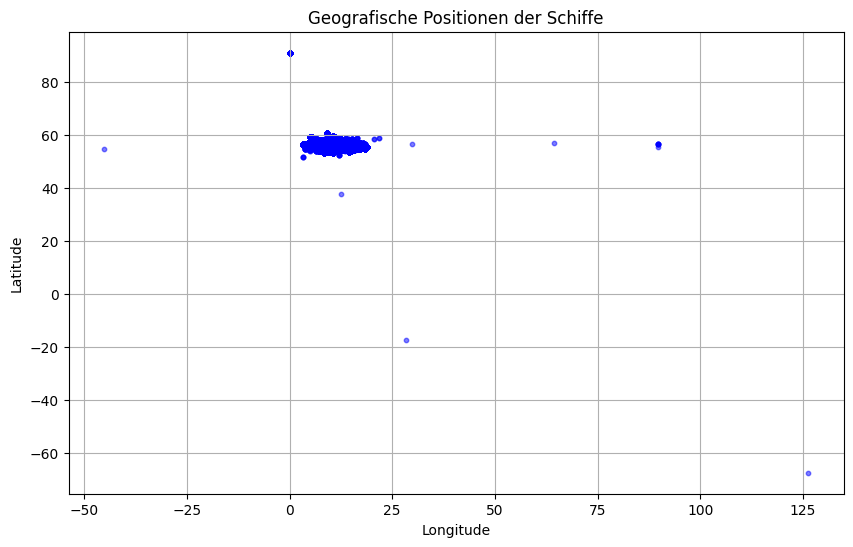

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Beispiel-Daten
df = pd.read_csv("/Users/konradmaywald/AdvDataEng_Project/aisdk-2024-03-01.csv")


# Scatterplot der geografischen Koordinaten
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], c='blue', alpha=0.5, s=10)
plt.title("Geografische Positionen der Schiffe")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()
plt.show()

In [32]:
!pip install folium

In [3]:
import folium

# Stichprobe aus dem Datensatz ziehen (z. B. 1000 zufällige Punkte)
sampled_data = df.sample(n=1000, random_state=42)  # Stichprobengröße: 1000

# Mittelpunkt der Karte basierend auf der Stichprobe berechnen
mean_lat = sampled_data['Latitude'].mean()
mean_lon = sampled_data['Longitude'].mean()

# Karte erstellen
mymap = folium.Map(location=[mean_lat, mean_lon], zoom_start=6)

# Marker für die Stichprobendaten hinzufügen
for _, row in sampled_data.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']], 
                  popup=row['Name']).add_to(mymap)

# Karte speichern
mymap.save("map.html")

In [ ]:
Die folgende Anweisung gibt eine Karte aus mit allen GPS-Koordinaten die das Schiff mit der MMSI Nummer 219000873 befahren hat

In [7]:
import folium

# Filter für ein bestimmtes Schiff
mmsi_number = 219000873  # Name des Schiffs
filtered_data = df[df['MMSI'] == mmsi_number]

# Mittelpunkt der Karte basierend auf den gefilterten Daten berechnen
mean_lat = filtered_data['Latitude'].mean()
mean_lon = filtered_data['Longitude'].mean()

# Karte erstellen
mymap = folium.Map(location=[mean_lat, mean_lon], zoom_start=10)

# Marker für das gefilterte Schiff hinzufügen
for _, row in filtered_data.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']], 
                  popup=f"{row['Name']} (MMSI: {row['MMSI']})").add_to(mymap)

# Karte speichern
mymap.save("map_filtered.html")

In [ ]:
Die folgende Anweisung gibt eine Karte aus mit allen den verschiedenen Routen die das Schiff mit der MMSI Nummer 219000873 befahren hat

In [11]:
import folium

# Beispiel-Daten für ein bestimmtes Schiff filtern (ersetze "123456789" mit der gewünschten MMSI)
mmsi_number = 219000873
filtered_data = df[df['MMSI'] == mmsi_number]

# Karte initialisieren
mean_lat = filtered_data['Latitude'].mean()
mean_lon = filtered_data['Longitude'].mean()
mymap = folium.Map(location=[mean_lat, mean_lon], zoom_start=8)

# Liste von Koordinaten für die Route
route_coords = list(zip(filtered_data['Latitude'], filtered_data['Longitude']))

# Route zur Karte hinzufügen
folium.PolyLine(route_coords, color="blue", weight=2.5, opacity=1).add_to(mymap)

# Karte speichern oder anzeigen
mymap.save("route_map.html")

In [ ]:
Dieser Code gibt an wie viele GPS Koordinaten ein bestimmtes Schiff (MMSI: 219000873) hat:

In [12]:
# MMSI-Nummer des Schiffs
mmsi_number = 219000873

# Daten für das spezifische Schiff filtern
filtered_data = df[df['MMSI'] == mmsi_number]

# Anzahl der GPS-Koordinaten berechnen
num_coordinates = len(filtered_data)

print(f"The ship with MMSI {mmsi_number} has {num_coordinates} GPS coordinates.")

The ship with MMSI 219000873 has 7009 GPS coordinates.


In [25]:
import folium
from folium import PolyLine

# Setze die MMSI, nach der du filtern möchtest
mmsi_to_filter = 219000873  # Ersetze dies mit der tatsächlichen MMSI des Schiffes

# Filtere die Daten nach der MMSI-Nummer und sortiere nach Timestamp
filtered_data = df[df['MMSI'] == mmsi_to_filter].sort_values(by='# Timestamp')

# Prüfen, ob es Daten für dieses Schiff gibt
if filtered_data.empty:
    print(f"No data available for MMSI: {mmsi_to_filter}")
else:
    # Hier gehen wir davon aus, dass jede Route durch einen bestimmten Zeitbereich oder Abstand der GPS-Daten definiert ist.
    # Beispiel: Wir unterteilen die Daten in verschiedene Routen, basierend auf einem Zeitintervall.

    # Beispiel für eine Methode zur Identifikation einer einzelnen Route:
    # Die Route wird als alle GPS-Daten zwischen zwei bestimmten Timestamps oder einer Zeitspanne definiert.
    
    # Wähle zum Beispiel den ersten 2 Stunden-Zeitraum als eine Route aus
    route_start_time = filtered_data['# Timestamp'].iloc[0]  # Anfang der Route
    route_end_time = route_start_time + pd.Timedelta(hours=2)  # Ende der Route (z.B. nach 2 Stunden)

    # Filtere die Daten nach dieser Zeitspanne
    route_data = filtered_data[(filtered_data['# Timestamp'] >= route_start_time) & (filtered_data['# Timestamp'] <= route_end_time)]

    # Berechne den Mittelpunkt der Karte (Durchschnitt von Latitude und Longitude)
    mean_lat = route_data['Latitude'].mean()
    mean_lon = route_data['Longitude'].mean()

    # Erstelle die Karte
    mymap = folium.Map(location=[mean_lat, mean_lon], zoom_start=14)

    # Erstelle eine Liste von Koordinaten (Latitude, Longitude) für diese Route
    route_coordinates = list(zip(route_data['Latitude'], route_data['Longitude']))

    # Prüfen, ob genug Koordinaten vorhanden sind, um eine Linie zu erstellen
    if len(route_coordinates) > 1:
        # Füge die Route als Polyline hinzu (blau und 2,5 px dick)
        PolyLine(route_coordinates, color="blue", weight=2.5, opacity=1).add_to(mymap)
    else:
        print("Nicht genug Koordinaten, um eine Route zu erstellen.")

    # Speichere die Karte
    mymap.save("single_route.html")
    print("Map with route saved as single_route.html")

TypeError: can only concatenate str (not "Timedelta") to str